# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [200]:
import pandas as pd
import plotly as pl
import plotly.express as px
import matplotlib.pyplot as plt
from plotly            import graph_objects
from plotly.graph_objs import Layout

In [165]:
df = pd.read_csv('dados.csv', header=[0,1], index_col=0)
df.head(5)

Adj Close                         Close                    \
                ITUB  PETR4.SA      VALE      ITUB   PETR4.SA   VALE   
Date                                                                   
2019-01-02  6.063303  9.149797  8.914260  8.004946  24.059999  13.47   
2019-01-03  6.144480  9.374169  8.490717  8.112119  24.650000  12.83   
2019-01-04  6.225655  9.400787  9.278242  8.219291  24.719999  14.02   
2019-01-07  6.169456  9.549103  9.152502  8.145095  25.110001  13.83   
2019-01-08  6.281855  9.492059  9.304714  8.293487  24.959999  14.06   

                High                         Low                        Open  \
                ITUB   PETR4.SA   VALE      ITUB   PETR4.SA   VALE      ITUB   
Date                                                                           
2019-01-02  8.037923  24.200001  13.48  7.625721  22.280001  12.92  7.633965   
2019-01-03  8.202803  24.820000  13.38  7.955482  23.799999  12.82  8.021434   
2019-01-04  8.301731  24.940001  14.09  8.004946  24.469999  13.34  8.054411   
2019-01-07  8.276999  25.920000  14.28  8.079143  24.700001  13.80  8.252267   
2019-01-08  8.326463  25.420000  14.15  8.070899  24.770000  13.85  8.128607   

                                  Volume                           
             PETR4.SA   VALE        ITUB     PETR4.SA        VALE  
Date                                                               
2019-01-02  22.549999  12.94  27493373.0  104534800.0  22120700.0  
2019-01-03  23.959999  13.36  19564962.0   95206400.0  27666700.0  
2019-01-04  24.850000  13.35  21330484.0   72119800.0  42880100.0  
2019-01-07  24.850000  14.23  25913319.0  121711900.0  26186100.0  
2019-01-08  25.400000  13.94  23478343.0   68761800.0  20270400.0

In [166]:
print(df['Adj Close'].isnull().sum())

ITUB        33
PETR4.SA    50
VALE        33
dtype: int64


In [167]:
df['Adj Close'].fillna(df['Adj Close'].mean(), inplace=True)

C:\Users\lksns\AppData\Local\Temp\ipykernel_21392\974053631.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

#### 1. Faça uma média móvel em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu

In [168]:
df_adj = df['Adj Close'].rolling(window=90).mean()
df_adj

,ITUB,PETR4.SA,VALE
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN
...,...,...,...
2024-03-18,6.434674,36.980835,13.566787
2024-03-19,6.446895,37.010214,13.551902
2024-03-20,6.461298,37.036217,13.540144


#### 2. Utilizando a fução rolling(), calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima

In [169]:
df_desvio = df['Adj Close'].rolling(90).std()
df_desvio

,ITUB,PETR4.SA,VALE
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN
...,...,...,...
2024-03-18,0.461236,5.249670,0.973362
2024-03-19,0.458529,5.236935,0.983814
2024-03-20,0.455271,5.229431,0.991482


#### 3. Monte um gráfico de linhas para as médias móveis dos ativos da sua base

In [179]:
df_mm = df_adj.stack().reset_index()
df_mm.columns= ['data', 'ativo', 'valor']

fig_mm = px.line(df_mm, x='data', y='valor', color='ativo')
fig_mm.write_image('media_movel.png')
fig_mm.show()

#### 4. Monte um gráfico de linhas para os desvios padrão em janela móvel

In [180]:
df_des_graf = df_desvio.stack().reset_index()
df_des_graf.columns= ['data', 'ativo', 'valor']

fig_dp = px.line(df_des_graf, x='data', y='valor', color='ativo')
fig_dp.write_image('desvio_padrao.png')
fig_dp.show()

#### 5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

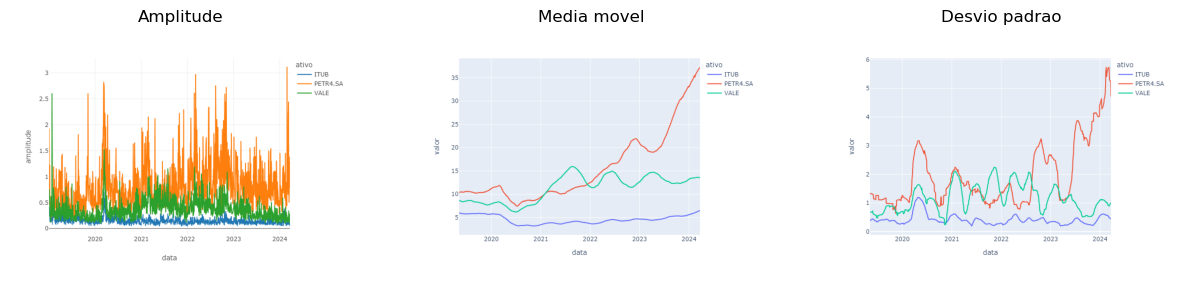

In [190]:
import matplotlib.pyplot as plt

# Carregar as imagens
imagem1 = plt.imread('amplitude.png')
imagem2 = plt.imread('media_movel.png')
imagem3 = plt.imread('desvio_padrao.png')

# Criar a figura e os subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Mostrar as imagens nos subplots
axs[0].imshow(imagem1)
axs[0].axis('off')
axs[0].set_title('Amplitude')

axs[1].imshow(imagem2)
axs[1].axis('off')
axs[1].set_title('Media movel')

axs[2].imshow(imagem3)
axs[2].axis('off')
axs[2].set_title('Desvio padrao')

plt.show()


Comparando os gráfico podemos notar que os gráficos mostram uma consistência dos dados ao longo do período em todos os graficos

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [195]:
df_60 = df.xs(key='ITUB', 
                  level=1, 
                  axis=1).tail(n=60)
df_60.head(5)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-12-29,6.722927,6.95,6.98,6.89,6.96,6274100.0
2024-01-02,6.587501,6.81,6.90,6.77,6.87,9910800.0
2024-01-03,6.529461,6.75,6.86,6.74,6.82,17218200.0
2024-01-04,6.490768,6.71,6.76,6.63,6.65,16459500.0
2024-01-05,6.664887,6.89,6.91,6.78,6.80,19241700.0


In [203]:
layout = Layout(paper_bgcolor='rgba(0,0,0,0)', 
                plot_bgcolor='white', 
                height=600)

graph = {
    'x': df_60.index, 
    'open': df_60.Open,
    'close': df_60.Close,
    'high': df_60.High,
    'low': df_60.Low,
    'type': 'candlestick',
    'name': 'ITUB',
    'showlegend': True
}

grafico = graph_objects.Figure(data=[graph], 
                               layout_title='Itaú', 
                               layout= layout)

grafico.update_xaxes(showgrid=True, 
                     gridwidth=1, 
                     gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, 
                     gridwidth=1, 
                     gridcolor='LightGrey')

grafico